In [2]:
import numpy as np
import matplotlib.pyplot as plt
# csv的lib，读取、计算等
import pandas as pd
# seaborn 图表lib
import seaborn as sns

In [ ]:
""" 
- GapRate 价差
- GapRateSqrt 价差的平方根
- MinTotal 该批次该楼盘最小产证面积 * 平均单价
- PoolSize 入围人数（未取整数）
- Transportation 交通系数 （二元）
- MiscFactor 其他系数（二元）
- Multiplier 社保系数
- Month50Base 该入围分对应50分基础分的买房客户需要的入围分数
"""

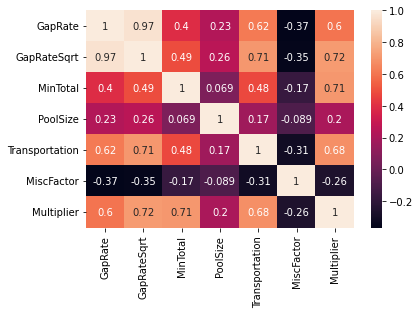

In [33]:
# 读取文件 
df_train = pd.read_csv('data5.csv')

# 规定列
feature_cols = ['GapRate', 'GapRateSqrt', 'MinTotal', 'PoolSize', 'Transportation', 'MiscFactor', 'Multiplier']

# 读取对应列的内容，作为x轴？
# 按照feature_cols获取对应列的数据
train_x = df_train.loc[:, feature_cols]

# 读取 Month50Base 作为y轴？
train_y = df_train.Month50Base

# print(train_x.corr())

# 制作热力图
# annot为annotate所写，True表示在heatmap中每个方格写入数据
sns.heatmap(train_x.corr(), annot=True)

# 读取文件
df_test = pd.read_csv('data6.csv')
# 估计六？ 
test_x = df_test.loc[:, feature_cols]

In [27]:
# 列出第六批核心重要数据的前五项
test6_x.head(5)


,GapRate,GapRateSqrt,MinTotal,PoolSize,Transportation,MiscFactor,Multiplier
0,0.416029,0.645003,670.890,1418.4,1,1,0.13
1,0.000000,0.000000,501.165,925.2,0,1,0.11
2,0.333333,0.577350,1470.000,470.0,1,0,0.21
3,0.000000,0.000000,516.800,12978.0,0,1,0.12
4,0.000000,0.000000,557.600,504.0,1,0,0.12


In [40]:
# 加载线性模型
from sklearn.linear_model import LinearRegression
# 训练模型
reg = LinearRegression().fit(train_x, train_y)

# 获取目标的社保月数
arrMonth50 = reg.predict(test_x)

#remove comments when you run 
# for i in arrMonth50:
#    # 显示正整数
#    print (round(max(0,i)))

In [29]:
coef = ["%.2f" % i for i in reg.coef_]
for i in range(7):
    print (feature_cols[i], "\t", coef[i])

GapRate 	 510.57
GapRateSqrt 	 -153.60
MinTotal 	 -0.01
PoolSize 	 -0.05
Transportation 	 90.23
MiscFactor 	 -43.54
Multiplier 	 -632.73


In [ ]:
""" 
- GapRate 价差
- GapRateSqrt 价差的平方根
- MinTotal 该批次该楼盘最小产证面积 * 平均单价
- PoolSize 入围人数（未取整数）
- Transportation 交通系数 （二元）
- MiscFactor 其他系数（二元）
- Multiplier 社保系数
- Month50Base 该入围分对应50分基础分的买房客户需要的入围分数
"""